<a href="https://colab.research.google.com/github/JacobAguirre9/HighDimensionalData/blob/master/ST_Project_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Important disclaimers/assumptions
#I replaced all NULL/NaN values with 0
#I removed the community name column from the data as it was a column of strings
#that had little impact on the labels.

In [21]:
# Importing Necessary Modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.core.frame import DataFrame


In [22]:
#Reading in data and cleaning such that all nulls are 0
dataset = np.loadtxt("communities.csv",delimiter=',',dtype=str,encoding="utf-8-sig")
for row in range(len(dataset)):
  for column in range(len(dataset[row])):
    if dataset[row, column] == '':
      dataset[row, column] = 0
dataset = np.asarray(dataset, dtype=float)

#Separating data into feature matrix and label vector
X = dataset[:, 0:126]
y = dataset[:, 126]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


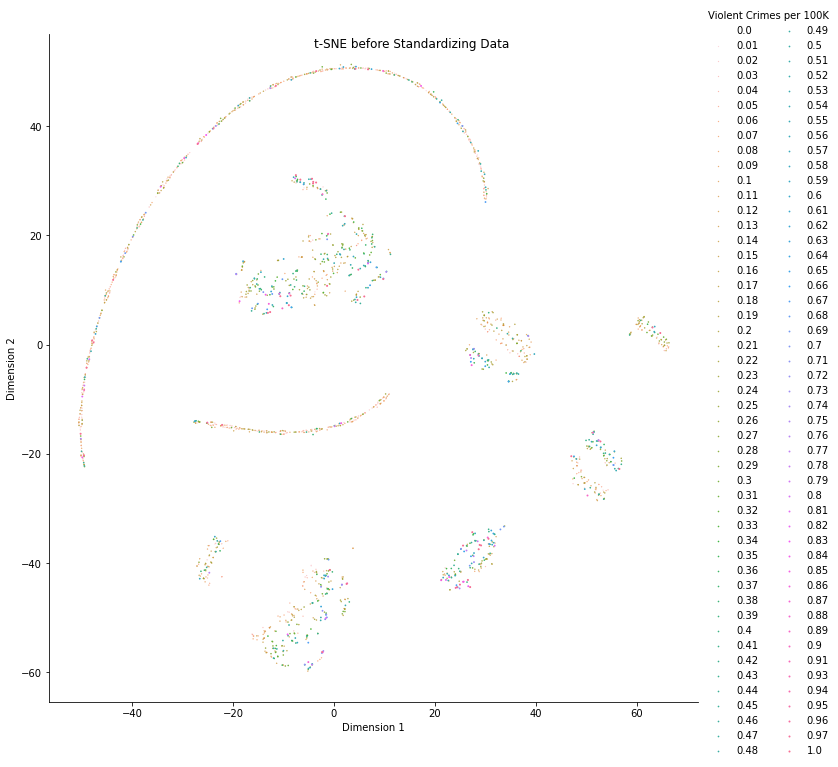

In [23]:
model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(dataset)

# creating a new data frame which helps us in plotting the result data
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data = tsne_data,
	columns =("Dimension 1", "Dimension 2", "Violent Crimes per 100K"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue = "Violent Crimes per 100K", size = 10, height  = 5).map(
	plt.scatter, 'Dimension 1', 'Dimension 2', 'Violent Crimes per 100K').add_legend(ncol=2)
plt.suptitle('t-SNE before Standardizing Data')
#plt.legend(loc="lower center", ncol=len(tsne_df["Violent Crimes per 100K"])/3)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


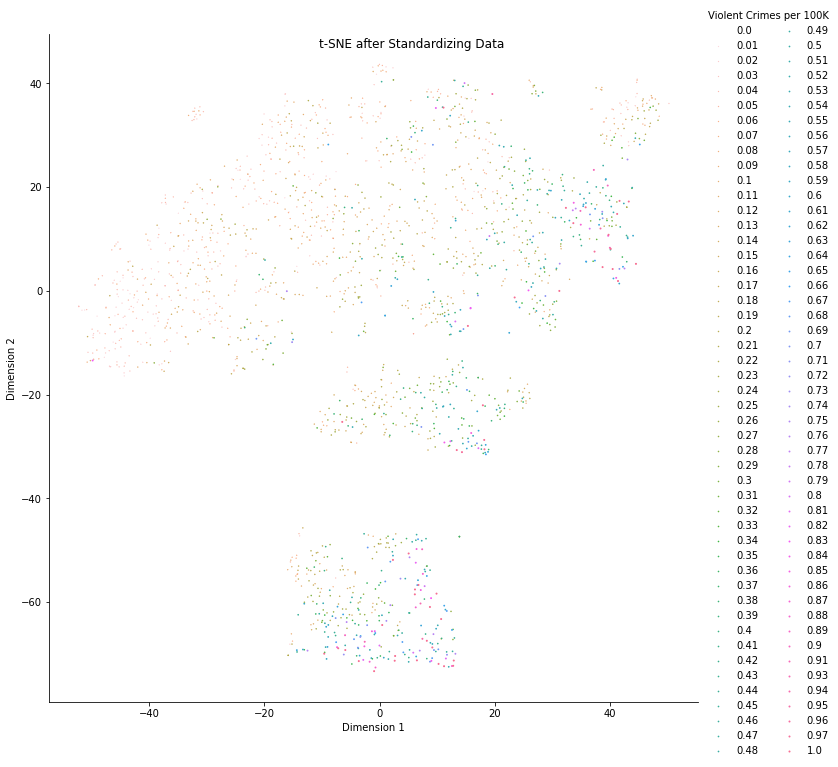

In [24]:
##visualizing the standardized version of the dataset

standardized_data = StandardScaler().fit_transform(dataset)
stand_model = TSNE(n_components = 2, random_state = 0)
stand_tsne_data = stand_model.fit_transform(standardized_data)

# creating a new data frame which help us in ploting the standardized data
stand_tsne_data = np.vstack((stand_tsne_data.T, y)).T
stand_tsne_df = pd.DataFrame(data = stand_tsne_data,
	columns =("Dimension 1", "Dimension 2", "Violent Crimes per 100K"))

# Ploting the result of standardized tsne
sns.FacetGrid(stand_tsne_df, hue = "Violent Crimes per 100K", size = 10, height  = 5, legend_out = True).map(
	plt.scatter, "Dimension 1", "Dimension 2", 'Violent Crimes per 100K').add_legend(ncol=2)
plt.suptitle('t-SNE after Standardizing Data')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


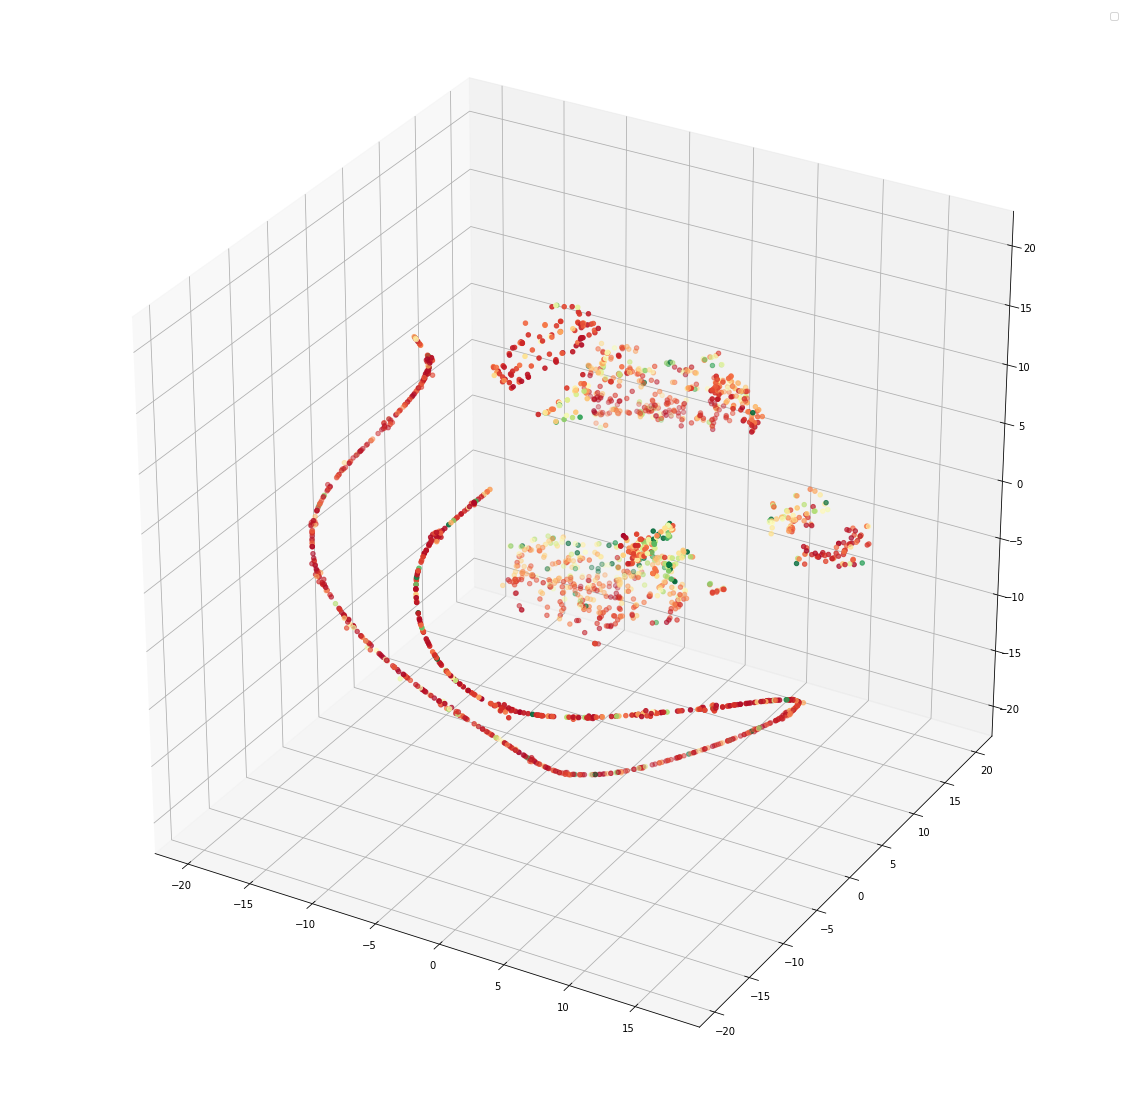

In [25]:
#Creating a 3D embedding
model3d = TSNE(n_components = 3, random_state = 0)

tsne_data3d = model3d.fit_transform(dataset)


# creating a new data frame which
# help us in ploting the result data
tsne_data3d = np.vstack((tsne_data3d.T, y)).T
#print(stand_tsne_data)
tsne_df3d = pd.DataFrame(data = tsne_data3d,
	columns =("Dimension 1", "Dimension 2", "Dimension 3", "Violent Crimes per 100K"))

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(111, projection='3d')
cm = plt.get_cmap("RdYlGn")
col = cm(tsne_df3d["Violent Crimes per 100K"])
ax.scatter(*zip(*tsne_data3d), c=col)
plt.legend(ncol=tsne_df3d["Violent Crimes per 100K"])
plt.show()

# Ploting the result of tsne
#sns.FacetGrid(tsne_df3d, hue = "Violent Crimes per 100K", size = 10, height  = 5, legend_out = True).map(
	#plt.scatter, "Dimension 1", "Dimension 2", "Dimension 3", 'Violent Crimes per 100K').add_legend(ncol=3)
#plt.suptitle('t-SNE after Standardizing Data')
#plt.show()